In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

## 3.2.6 Decision Tree and Random Forest Comparison

Comparison done using wine quality data.

In [71]:
# Load red wine quality data from before.
df = pd.read_csv('winequality-red.csv', delimiter=';')

# Set up variables into different dataframes for model input 
X = df.drop(columns='quality')
Y = df['quality']

### Decision Tree

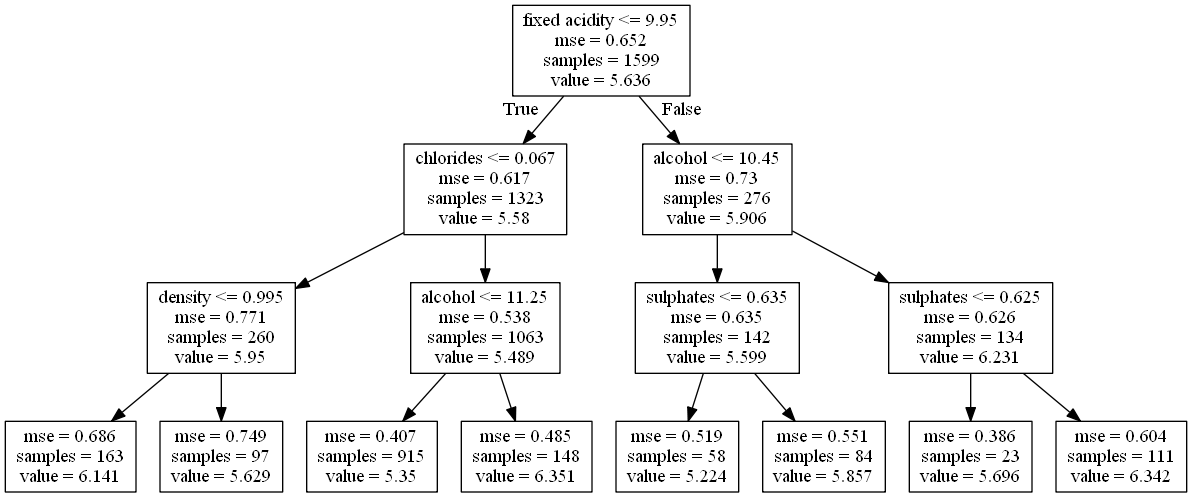

In [120]:
# Import model
from sklearn import tree

# Help display visualizations
from IPython.display import Image

# Packages for rendering tree
import pydotplus
from pydotplus import graphviz

# Initialize and train tree
regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=3,
    max_features=3 # roughly n features divided by 3
)

regressor_tree.fit(X, Y)

# Render tree
dot_data = tree.export_graphviz(
    regressor_tree, out_file=None,
    feature_names=X.columns,
    class_names=Y,
)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [121]:
# Cross validation 
from sklearn.model_selection import cross_val_score
tree_score = cross_val_score(regressor_tree, X, Y, cv=5)
print('Mean:', tree_score.mean(), '\nVariance:', tree_score.std()*2)

Mean: 0.1027760816220453 
Variance: 0.27126643589319516


### Random Forest

In [124]:
# Import model
from sklearn import ensemble

# Initialize and cross-validate forest
forest_regression = ensemble.RandomForestClassifier(
    max_depth=2,
    max_features=3
)

forest_score = cross_val_score(forest_regression, X, Y, cv=5)
print('Mean:', forest_score.mean(), '\nVariance:', forest_score.std()*2)

Mean: 0.5579545224692554 
Variance: 0.04480397958447395


The random forest substantially increases the model's r-squared value even with a reduced `max_depth`.

### Runtime 

In [125]:
import time

In [126]:
# Test runtime of Tree
start = time.time()

regressor_tree = tree.DecisionTreeRegressor(
    criterion='mse',
    max_depth=4,
    max_features=3
)

tree_score = cross_val_score(regressor_tree, X, Y, cv=5)

end = time.time()
tree_time = end-start
print(tree_time)

0.01901865005493164


In [127]:
# Test runtime of Forest

start = time.time()

forest_regression = ensemble.RandomForestClassifier(
    max_depth=4,
    max_features=3
)

forest_score = cross_val_score(forest_regression, X, Y, cv=5)

end = time.time()
forest_time = end-start
print(forest_time)

0.12533140182495117


In [128]:
print('Forest is', round(forest_time/tree_time, 2), 'times slower than the tree')

Forest is 6.59 times slower than the tree
